In [2]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [3]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [4]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-09-30,0.239144
2023-12-31,1.166981
2024-03-31,1.172372
2024-06-30,-0.214586


In [5]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [6]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-03-31,8.448607
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104


In [7]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2023-12-31,8.679346
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453


In [8]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.763788
2014-09-30,4.445903
2014-12-31,0.341941
2015-03-31,2.981396
2015-06-30,10.861409
2015-09-30,2.101863
2015-12-31,-0.955240
2016-03-31,0.426535
2016-06-30,7.905282
2016-09-30,1.055159


In [9]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.961426
1999-09-30,-0.081735
1999-12-31,2.497882
2000-03-31,3.497321
2000-06-30,-0.165239
...,...
2023-12-31,-0.295617
2024-03-31,0.847376
2024-06-30,0.521898
2024-09-30,0.926751


In [10]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [11]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [12]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2023-12-31,51.281538
2024-03-31,56.011538
2024-06-30,64.856923
2024-09-30,60.701538


In [13]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2023-12-31,38.312308
2024-03-31,45.396154
2024-06-30,55.676923
2024-09-30,54.311538


In [14]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2023-12-31,47.333077
2024-03-31,53.394615
2024-06-30,63.980000
2024-09-30,59.335385


In [15]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2023-12-31,-1.252183
2024-03-31,2.997446
2024-06-30,-4.063438
2024-09-30,-1.257083


In [16]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2023-12-31,9.904875
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.936994


In [17]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2023-12-31,10.134204
2024-03-31,8.359733
2024-06-30,7.890231
2024-09-30,10.962496


In [18]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2023-12-31,13.161442
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692


In [19]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2023-12-31,8.572045
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864


In [20]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2023-12-31,-0.635728
2024-03-31,-1.343570
2024-06-30,-0.648508
2024-09-30,-3.426893


In [21]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [22]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))
kko=kko.pct_change()*100
kko=kko.dropna()
kko

,KKO
2007-06-30,1.882931
2007-09-30,-1.366010
2007-12-31,-0.407332
2008-03-31,-0.899796
2008-06-30,0.371440
...,...
2023-12-31,0.915033
2024-03-31,-0.431779
2024-06-30,-0.346921
2024-09-30,-1.000870


In [23]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2014-03-31,9.400000
2014-06-30,9.700000
2014-09-30,10.066667
2014-12-31,10.400000
2015-03-31,10.566667
2015-06-30,10.300000
2015-09-30,10.133333
2015-12-31,10.266667
2016-03-31,10.166667
2016-06-30,10.366667


In [24]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2023-12-31,2.650705
2024-03-31,-0.583090
2024-06-30,0.209468
2024-09-30,-5.852843


In [25]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [26]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,6.564246
2016-06-30,-1.441678
2016-09-30,-3.125000
2016-12-31,-1.921757
2017-03-31,2.379286
2017-06-30,3.007519
2017-09-30,6.104844
2017-12-31,1.563477
2018-03-31,-1.108374
2018-06-30,1.556663


In [61]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2024-12-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(0)
#data["İşsizlik"].iloc[-1]=8.8
data=data.astype(float)
data=data.dropna()
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,0.172265,12.387354,10.366667,7.905282,3.679217,2.954271,2.858421,9.655385,...,2.176211,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,-1.441678
2016-09-30,-2.867673,-11.986557,-0.730868,-11.706412,11.266667,1.055159,2.393532,3.287543,3.173361,9.039286,...,0.777703,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-3.125000
2016-12-31,5.509612,18.585843,0.909485,10.443895,11.733333,0.564865,7.431690,5.087110,4.898119,8.851538,...,1.838075,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,-1.921757
2017-03-31,1.368865,-2.150997,0.000000,-1.533311,11.933333,1.778078,5.128144,4.833735,4.709149,8.805385,...,1.372056,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,2.379286
2017-06-30,2.280319,4.684057,1.416309,13.467062,11.233333,9.027657,5.390604,4.335505,4.227601,10.147692,...,1.080917,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,3.007519
2017-09-30,1.515919,-4.403850,-0.507829,5.743089,10.466667,6.161197,3.331476,3.046696,3.148272,10.856923,...,2.459291,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,6.104844
2017-12-31,1.882761,12.045111,1.190983,6.168259,10.100000,1.363470,6.523372,4.880301,5.005775,11.167692,...,0.942032,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,1.563477
2018-03-31,1.267288,-2.255476,-0.546448,-2.529621,9.933333,0.835828,3.350712,1.892066,2.053103,11.386923,...,0.791129,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,-1.108374
2018-06-30,0.588499,0.252231,-1.098901,-0.590437,10.500000,10.634017,8.472543,8.311555,8.300886,12.697692,...,-0.236475,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,1.556663
2018-09-30,-0.961150,-0.943565,-1.581197,-16.392345,11.166667,7.885191,10.581760,11.410152,10.947282,17.533077,...,-0.925885,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-12.875536


In [62]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.402473,0.042102,1.062027,-0.494257,-0.249189,-0.599141,-0.937318,-1.000959,-0.737675,-0.754276,...,-0.099585,-0.044564,-0.926360,0.274589,-0.809003,-1.014665,-0.228517,0.749899,-0.207280,0.077998
1,-1.393136,-0.188139,-1.454718,0.058492,-0.856084,-0.827858,-0.874376,-0.941017,-0.783827,-0.795844,...,-0.046936,-0.503368,-0.885734,0.353317,-0.900540,-0.577406,-0.073891,-0.926501,-0.457061,-1.103105
2,1.577243,0.230046,0.859021,0.345102,-0.899522,0.068406,-0.534508,-0.612749,-0.797891,-0.808762,...,0.082014,0.469663,-0.746544,-0.379853,-0.610197,0.331626,0.012988,1.072125,-0.278517,1.198698
3,-0.437524,-0.001814,-0.392074,0.467935,-0.792036,-0.341384,-0.582361,-0.648715,-0.801348,-0.786422,...,-0.170803,0.079991,-0.361316,-0.482749,-0.037295,0.534888,-0.634324,0.301241,0.359695,0.060957
4,0.226561,0.359254,1.174810,0.038020,-0.149751,-0.294693,-0.676457,-0.740367,-0.700797,-0.683516,...,0.219129,0.373756,-0.728722,0.950591,-0.759366,-1.158537,0.656256,-0.543310,0.452916,0.311394
5,-0.656409,-0.131278,0.367992,-0.432840,-0.403708,-0.661002,-0.919863,-0.945793,-0.647669,-0.656880,...,0.310757,0.181288,-1.029328,0.025363,-0.841740,-1.021208,0.125582,1.162888,0.912514,0.101362
6,0.941753,0.301810,0.412404,-0.658034,-0.828768,-0.093179,-0.573567,-0.592259,-0.624389,-0.636814,...,0.044220,0.387725,-0.481010,-0.906570,-0.538233,0.034823,0.032316,-0.089575,0.238641,0.202159
7,-0.447675,-0.141123,-0.496145,-0.760395,-0.875515,-0.657580,-1.137927,-1.154233,-0.607967,-0.613615,...,-0.031782,-0.235630,-0.671732,0.950306,-0.419594,-0.783404,0.000095,-0.103938,-0.157823,0.033047
8,-0.204030,-0.281963,-0.293585,-0.412368,-0.007434,0.253569,0.074463,0.034891,-0.509778,-0.536890,...,-0.578408,-0.306983,-0.337098,-0.234752,0.001528,0.747864,-0.470011,-0.161608,0.237630,-0.153462
9,-0.320212,-0.404918,-1.944193,-0.002925,-0.250969,0.628789,0.659666,0.538572,-0.147561,-0.197898,...,-1.079620,-0.370191,-0.035513,-0.713335,0.689328,2.180793,-0.852821,-0.126313,-1.903899,-0.579255


In [63]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [71]:
data.columns

Index(['Büyüme', 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI'],
      dtype='object')

In [73]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']


def objective(trial):
    features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
    selected_features = []
    for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
    y_train,y_test=y[:-10],y[-10:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu','exponential'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])

    return mse  # Return validation accuracy as the objective

In [74]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

[I 2025-01-02 20:23:31,773] A new study created in memory with name: no-name-e264e603-12e7-4c1e-84a7-41ee445268ed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


[I 2025-01-02 20:23:34,663] Trial 0 finished with value: 131.3474513359222 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': False, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': False, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.06257589855170596, 'units1': 239, 'batch_size': 7, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.9477595691193886}. Best is trial 0 with value: 131.3474513359222.


[-3.4384553]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-01-02 20:23:37,405] Trial 1 finished with value: 3.8931649024808985 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': False, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': False, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': True, 'Tüketici Güven': False, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.009572080784962016, 'units1': 155, 'batch_size': 87, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1279391448365209}. Best is trial 1 with value: 3.8931649024808985.


[2.3125858]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-01-02 20:23:41,328] Trial 2 finished with value: 2.66555784544825 and parameters: {'İhracat': True, 'KKO': True, 'İthalat': False, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.018888911384126007, 'units1': 112, 'batch_size': 90, 'activation1': 'exponential', 'optimizer': 'adam', 'rlrate': 0.836285544524326}. Best is trial 2 with value: 2.66555784544825.


[0.9974052]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


[I 2025-01-02 20:23:44,528] Trial 3 finished with value: 14.52028039524428 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': False, 'Kart': False, 'Kredi': False, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.0942239068133873, 'units1': 172, 'batch_size': 116, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.5120140961653497}. Best is trial 2 with value: 2.66555784544825.


[4.3983493]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


[I 2025-01-02 20:23:47,359] Trial 4 finished with value: 3.2832958336697833 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': False, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': False, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.017602905805727327, 'units1': 128, 'batch_size': 128, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.14329694984235858}. Best is trial 2 with value: 2.66555784544825.


[-1.1028318]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


[I 2025-01-02 20:23:50,591] Trial 5 finished with value: 38.96493073277671 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': True, 'Kart': False, 'Kredi': True, 'M2': False, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.07494643345621735, 'units1': 180, 'batch_size': 92, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.8299015951884178}. Best is trial 2 with value: 2.66555784544825.


[5.118127]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-01-02 20:24:02,686] Trial 6 finished with value: 1.559418753331559 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': False, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.0086205653558007, 'units1': 31, 'batch_size': 72, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.8010504983532122}. Best is trial 6 with value: 1.559418753331559.


[1.051845]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2025-01-02 20:25:14,714] Trial 7 finished with value: 1.8101665167085852 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': False, 'Kart': False, 'Kredi': False, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.00017815995721822433, 'units1': 27, 'batch_size': 92, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.8671889726777808}. Best is trial 6 with value: 1.559418753331559.


[0.2230624]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-01-02 20:25:17,090] Trial 8 finished with value: 5.071586787187632 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': True, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': False, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.012901686989513377, 'units1': 248, 'batch_size': 68, 'activation1': 'exponential', 'optimizer': 'adam', 'rlrate': 0.5569166518243351}. Best is trial 6 with value: 1.559418753331559.


[-2.3863208]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


[I 2025-01-02 20:25:19,821] Trial 9 finished with value: 4.247538526812328 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': False, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.06043303354183448, 'units1': 34, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2286708929012303}. Best is trial 6 with value: 1.559418753331559.


[0.24162412]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[I 2025-01-02 20:25:22,572] Trial 10 finished with value: 3.324922997292328 and parameters: {'İhracat': True, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': False, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.03745619999850033, 'units1': 69, 'batch_size': 40, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.6202808437583816}. Best is trial 6 with value: 1.559418753331559.


[0.9688701]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-01-02 20:26:22,424] Trial 11 finished with value: 2.7591206284033785 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': False, 'Kredi': False, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.0008693976573982479, 'units1': 19, 'batch_size': 57, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.7245300952060272}. Best is trial 6 with value: 1.559418753331559.


[1.326211]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[I 2025-01-02 20:26:24,965] Trial 12 finished with value: 2.0729023269299507 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': False, 'İşsizlik': False, 'Kart': False, 'Kredi': False, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.03530456133919348, 'units1': 77, 'batch_size': 67, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.3562752678157703}. Best is trial 6 with value: 1.559418753331559.


[-0.51604766]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2025-01-02 20:26:36,586] Trial 13 finished with value: 2.4978843536328608 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': False, 'Kart': False, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.03702616849054253, 'units1': 4, 'batch_size': 100, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.9832759850167279}. Best is trial 6 with value: 1.559418753331559.


[1.0187329]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


[I 2025-01-02 20:27:55,743] Trial 14 finished with value: 0.890201353532158 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0005446428507576047, 'units1': 57, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7237585655742182}. Best is trial 14 with value: 0.890201353532158.


[1.7241931]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-01-02 20:27:59,139] Trial 15 finished with value: 1.2082972184607483 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.027653794605423734, 'units1': 67, 'batch_size': 48, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6981889897699494}. Best is trial 14 with value: 0.890201353532158.


[1.7217584]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2025-01-02 20:28:07,146] Trial 16 finished with value: 2.1875165065087847 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.03419518430108757, 'units1': 75, 'batch_size': 44, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6888178761152004}. Best is trial 14 with value: 0.890201353532158.


[1.3205942]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-01-02 20:28:09,962] Trial 17 finished with value: 0.9630077504432657 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.02523584028859841, 'units1': 94, 'batch_size': 35, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4022162197898049}. Best is trial 14 with value: 0.890201353532158.


[2.090525]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-01-02 20:28:12,881] Trial 18 finished with value: 2.0105877290713456 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.050504309534899545, 'units1': 104, 'batch_size': 27, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3979024146940686}. Best is trial 14 with value: 0.890201353532158.


[1.3791726]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


[I 2025-01-02 20:28:16,911] Trial 19 finished with value: 1.3228959421018993 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.02535047154072463, 'units1': 97, 'batch_size': 29, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3915076729907347}. Best is trial 14 with value: 0.890201353532158.


[2.1297016]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-01-02 20:28:20,254] Trial 20 finished with value: 1.447989657878823 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.05062379814749943, 'units1': 54, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.29252000649749643}. Best is trial 14 with value: 0.890201353532158.


[0.09134442]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[I 2025-01-02 20:28:23,917] Trial 21 finished with value: 0.9596601852574488 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.026133173840775688, 'units1': 53, 'batch_size': 49, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.60038341547029}. Best is trial 14 with value: 0.890201353532158.


[1.3103055]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[I 2025-01-02 20:28:27,228] Trial 22 finished with value: 0.9951749234215649 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.026833638425397655, 'units1': 50, 'batch_size': 55, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.45630409781571424}. Best is trial 14 with value: 0.890201353532158.


[1.9707332]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-01-02 20:28:30,022] Trial 23 finished with value: 1.3054270673005948 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.04508184868863306, 'units1': 93, 'batch_size': 35, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5834702094595388}. Best is trial 14 with value: 0.890201353532158.


[1.0381321]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2025-01-02 20:28:32,380] Trial 24 finished with value: 7.1832063790844565 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.021688955037859357, 'units1': 140, 'batch_size': 21, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.6364110031267409}. Best is trial 14 with value: 0.890201353532158.


[-3.4047778]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


[I 2025-01-02 20:29:10,132] Trial 25 finished with value: 1.1873894817421526 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.009711634458436973, 'units1': 54, 'batch_size': 55, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.4798244695591615}. Best is trial 14 with value: 0.890201353532158.


[1.5858657]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-01-02 20:29:13,955] Trial 26 finished with value: 1.1335866704521809 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.04334479355395515, 'units1': 122, 'batch_size': 77, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.04468889587411867}. Best is trial 14 with value: 0.890201353532158.


[-0.23645943]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


[I 2025-01-02 20:29:18,537] Trial 27 finished with value: 1.7926430714515016 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.0633997847675977, 'units1': 88, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7286274703791917}. Best is trial 14 with value: 0.890201353532158.


[1.5834476]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


[I 2025-01-02 20:29:24,552] Trial 28 finished with value: 2.3419027158674948 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.015623963773229027, 'units1': 211, 'batch_size': 36, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5171500846846263}. Best is trial 14 with value: 0.890201353532158.


[2.661462]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-01-02 20:29:39,455] Trial 29 finished with value: 1.2527089500338984 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': False, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.005528154460777657, 'units1': 43, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.922584945659503}. Best is trial 14 with value: 0.890201353532158.


[2.0791337]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


[I 2025-01-02 20:29:49,832] Trial 30 finished with value: 1.2232574281185893 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.03020170033305277, 'units1': 12, 'batch_size': 53, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2671510478239617}. Best is trial 14 with value: 0.890201353532158.


[1.6815522]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


[I 2025-01-02 20:29:56,809] Trial 31 finished with value: 1.285893509673806 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.022081118355149566, 'units1': 51, 'batch_size': 62, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.44725366339177275}. Best is trial 14 with value: 0.890201353532158.


[1.2580594]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


[I 2025-01-02 20:30:01,829] Trial 32 finished with value: 0.7068654215152285 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.05776950631328721, 'units1': 57, 'batch_size': 46, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4409660169934151}. Best is trial 32 with value: 0.7068654215152285.


[1.2385311]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2025-01-02 20:30:05,549] Trial 33 finished with value: 1.864119995726438 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.06154973281503232, 'units1': 84, 'batch_size': 43, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36135468028247136}. Best is trial 32 with value: 0.7068654215152285.


[0.6278884]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


[I 2025-01-02 20:30:08,647] Trial 34 finished with value: 141.7122550807374 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.07968401253932735, 'units1': 109, 'batch_size': 33, 'activation1': 'exponential', 'optimizer': 'adam', 'rlrate': 0.7685604742316947}. Best is trial 32 with value: 0.7068654215152285.


[-7.303502]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


[I 2025-01-02 20:30:12,620] Trial 35 finished with value: 0.8324514653388573 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.05452650111074843, 'units1': 63, 'batch_size': 49, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.5604017649684853}. Best is trial 32 with value: 0.7068654215152285.


[1.5065258]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2025-01-02 20:30:15,207] Trial 36 finished with value: 1.3495951212337856 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0685135079254541, 'units1': 64, 'batch_size': 79, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.6496639338166764}. Best is trial 32 with value: 0.7068654215152285.


[2.1624112]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-01-02 20:30:17,945] Trial 37 finished with value: 7.331315011026258 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.056347188627916024, 'units1': 143, 'batch_size': 62, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.5561779489572124}. Best is trial 32 with value: 0.7068654215152285.


[3.476288]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-01-02 20:30:20,565] Trial 38 finished with value: 16.068252982168268 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.07899301179629621, 'units1': 40, 'batch_size': 46, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.5226158643369185}. Best is trial 32 with value: 0.7068654215152285.


[-3.59506]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


[I 2025-01-02 20:30:23,013] Trial 39 finished with value: 68.39943471453599 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': False, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.09528432293839798, 'units1': 171, 'batch_size': 48, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.7846233272933439}. Best is trial 32 with value: 0.7068654215152285.


[-3.758107]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


[I 2025-01-02 20:30:25,807] Trial 40 finished with value: 1.4917694058006734 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': False, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.0672265484631705, 'units1': 21, 'batch_size': 75, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.879231787731125}. Best is trial 32 with value: 0.7068654215152285.


[1.6883909]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-01-02 20:30:28,701] Trial 41 finished with value: 2.5920257438601735 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.052458604539374586, 'units1': 59, 'batch_size': 39, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.5807134683548957}. Best is trial 32 with value: 0.7068654215152285.


[3.6493335]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


[I 2025-01-02 20:30:34,865] Trial 42 finished with value: 5.901336807705974 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.04476611974776135, 'units1': 118, 'batch_size': 60, 'activation1': 'exponential', 'optimizer': 'adam', 'rlrate': 0.4324340718033364}. Best is trial 32 with value: 0.7068654215152285.


[-0.35153657]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-01-02 20:30:37,102] Trial 43 finished with value: 1.831128053413753 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.05557782198690229, 'units1': 33, 'batch_size': 29, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3155012548194433}. Best is trial 32 with value: 0.7068654215152285.


[1.3365518]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


[I 2025-01-02 20:30:39,355] Trial 44 finished with value: 13.533319167682752 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.0421552078507392, 'units1': 80, 'batch_size': 49, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.16363284726024652}. Best is trial 32 with value: 0.7068654215152285.


[0.7378001]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2025-01-02 20:30:41,483] Trial 45 finished with value: 25.180831309971854 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.08895962218522149, 'units1': 96, 'batch_size': 52, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6185442752019303}. Best is trial 32 with value: 0.7068654215152285.


[7.0054183]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


[I 2025-01-02 20:31:01,241] Trial 46 finished with value: 3.352175232345867 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': False, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.004125290195087509, 'units1': 70, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5132221888210109}. Best is trial 32 with value: 0.7068654215152285.


[2.444822]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-01-02 20:31:04,894] Trial 47 finished with value: 0.9749450165961834 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.017188482565346795, 'units1': 42, 'batch_size': 40, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.6664195956549865}. Best is trial 32 with value: 0.7068654215152285.


[0.3287186]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-01-02 20:31:08,122] Trial 48 finished with value: 1.2297338647672558 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.013211203277191788, 'units1': 78, 'batch_size': 103, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5877332840422095}. Best is trial 32 with value: 0.7068654215152285.


[1.879872]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-01-02 20:31:10,679] Trial 49 finished with value: 4.305470086888368 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': False, 'İşsizlik': True, 'Kart': False, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.07244825135306335, 'units1': 23, 'batch_size': 20, 'activation1': 'exponential', 'optimizer': 'adam', 'rlrate': 0.7396635130311945}. Best is trial 32 with value: 0.7068654215152285.


[1.464059]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[I 2025-01-02 20:31:12,992] Trial 50 finished with value: 10.29051987760351 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': False, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.03210569349825769, 'units1': 105, 'batch_size': 42, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.21734196449384957}. Best is trial 32 with value: 0.7068654215152285.


[5.794307]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


[I 2025-01-02 20:31:17,521] Trial 51 finished with value: 1.601262010725995 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.019848238841137827, 'units1': 45, 'batch_size': 37, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.6665291246484762}. Best is trial 32 with value: 0.7068654215152285.


[-1.0984855]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-01-02 20:31:24,175] Trial 52 finished with value: 1.2261085000103629 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.011474115184960297, 'units1': 62, 'batch_size': 33, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.8265757125811307}. Best is trial 32 with value: 0.7068654215152285.


[-0.26375765]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-01-02 20:31:28,205] Trial 53 finished with value: 1.8797557047338733 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.015839820000332815, 'units1': 39, 'batch_size': 26, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.688990953331159}. Best is trial 32 with value: 0.7068654215152285.


[-0.8230174]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2025-01-02 20:31:38,078] Trial 54 finished with value: 1.1511931605006958 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.005609675784619178, 'units1': 29, 'batch_size': 59, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4136889071916807}. Best is trial 32 with value: 0.7068654215152285.


[-0.28468603]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[I 2025-01-02 20:31:44,076] Trial 55 finished with value: 1.2824102819153655 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': False, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0253012919009788, 'units1': 12, 'batch_size': 51, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.4859263780694831}. Best is trial 32 with value: 0.7068654215152285.


[-2.1189673]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-01-02 20:31:46,369] Trial 56 finished with value: 0.7995272315882818 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.039055876444585864, 'units1': 71, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34508508996909426}. Best is trial 32 with value: 0.7068654215152285.


[0.75823885]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-01-02 20:31:50,328] Trial 57 finished with value: 3.4935129533801947 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': False, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': True, 'PMI': True, 'learning_rate': 0.039563426690526586, 'units1': 73, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34990539663664133}. Best is trial 32 with value: 0.7068654215152285.


[1.6002156]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2025-01-02 20:31:52,838] Trial 58 finished with value: 1.8659925568897537 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.04627876059190471, 'units1': 88, 'batch_size': 84, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5447530532586045}. Best is trial 32 with value: 0.7068654215152285.


[0.5341349]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


[I 2025-01-02 20:31:55,074] Trial 59 finished with value: 1.9050433845678287 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.056820750072451354, 'units1': 62, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3159341373281335}. Best is trial 32 with value: 0.7068654215152285.


[0.40465158]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-01-02 20:31:57,750] Trial 60 finished with value: 1.9659985392506627 and parameters: {'İhracat': False, 'KKO': False, 'İthalat': False, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.039512640855217454, 'units1': 98, 'batch_size': 66, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.38083770593166927}. Best is trial 32 with value: 0.7068654215152285.


[0.3122415]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[I 2025-01-02 20:32:01,029] Trial 61 finished with value: 2.189702267929014 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': True, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.028472418074483877, 'units1': 49, 'batch_size': 45, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.46288632372453375}. Best is trial 32 with value: 0.7068654215152285.


[0.7591923]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-01-02 20:32:04,472] Trial 62 finished with value: 2.6999190798385526 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.03341205754536664, 'units1': 56, 'batch_size': 41, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6162567780736418}. Best is trial 32 with value: 0.7068654215152285.


[2.0448914]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-01-02 20:32:08,154] Trial 63 finished with value: 1.761239696295177 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.023621209613508602, 'units1': 38, 'batch_size': 53, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.6639288393887994}. Best is trial 32 with value: 0.7068654215152285.


[-1.0671773]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-01-02 20:32:13,622] Trial 64 finished with value: 4.090704097386902 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': False, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.01711788049244564, 'units1': 73, 'batch_size': 32, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.42246119834107304}. Best is trial 32 with value: 0.7068654215152285.


[-0.334145]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-01-02 20:32:15,742] Trial 65 finished with value: 1.8409059147528133 and parameters: {'İhracat': False, 'KKO': True, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': False, 'M2': False, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': False, 'Reel Güven': False, 'Sanayi': False, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': False, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.047256719988506356, 'units1': 216, 'batch_size': 46, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7059723286930275}. Best is trial 32 with value: 0.7068654215152285.


[0.38259983]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2025-01-02 20:33:29,285] Trial 66 finished with value: 0.8907539766641838 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.001002427545554286, 'units1': 66, 'batch_size': 39, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.7588063898654404}. Best is trial 32 with value: 0.7068654215152285.


[2.3317976]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-01-02 20:34:13,751] Trial 67 finished with value: 1.1865656275679477 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': True, 'learning_rate': 0.0010835514563642698, 'units1': 83, 'batch_size': 73, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.754937913565624}. Best is trial 32 with value: 0.7068654215152285.


[2.658529]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2025-01-02 20:34:47,045] Trial 68 finished with value: 0.6170554507808405 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': True, 'Mevduat Faiz 1Ay': False, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': True, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.008807828546077978, 'units1': 68, 'batch_size': 25, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.24501787306589456}. Best is trial 68 with value: 0.6170554507808405.


[1.9662888]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-01-02 20:34:50,565] Trial 69 finished with value: 0.7877056200699529 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.008065079400183927, 'units1': 67, 'batch_size': 15, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.20824263673141535}. Best is trial 68 with value: 0.6170554507808405.


[1.5876703]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:34:52,865] Trial 70 finished with value: 1.341123223017764 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': False, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.008131898511344902, 'units1': 133, 'batch_size': 11, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.21304087453011603}. Best is trial 68 with value: 0.6170554507808405.


[1.9840505]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-01-02 20:36:05,311] Trial 71 finished with value: 0.7001125327010089 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0010382533411133594, 'units1': 67, 'batch_size': 23, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.10808163238727794}. Best is trial 68 with value: 0.6170554507808405.


[1.9654022]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-01-02 20:37:15,222] Trial 72 finished with value: 0.9805757997307877 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.00038380283989713896, 'units1': 58, 'batch_size': 20, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.059772427460544286}. Best is trial 68 with value: 0.6170554507808405.


[1.2310934]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:37:34,029] Trial 73 finished with value: 0.7735663557478722 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.00394751377359462, 'units1': 71, 'batch_size': 4, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.10340711138378167}. Best is trial 68 with value: 0.6170554507808405.


[1.7922069]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:38:16,962] Trial 74 finished with value: 1.0097336055636033 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.004047865643516668, 'units1': 88, 'batch_size': 8, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.09802847047474317}. Best is trial 68 with value: 0.6170554507808405.


[2.3625684]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-01-02 20:38:19,591] Trial 75 finished with value: 0.7657302366163272 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.007991596213079115, 'units1': 72, 'batch_size': 5, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.16948514664125963}. Best is trial 68 with value: 0.6170554507808405.


[1.2337521]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2025-01-02 20:38:21,864] Trial 76 finished with value: 1.0948717744841936 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': False, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.008137071630269452, 'units1': 68, 'batch_size': 5, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.007683012031995479}. Best is trial 68 with value: 0.6170554507808405.


[1.722783]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-01-02 20:38:24,613] Trial 77 finished with value: 0.826212289339486 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.011723399679162068, 'units1': 74, 'batch_size': 16, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.16243914275515903}. Best is trial 68 with value: 0.6170554507808405.


[1.3304998]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-01-02 20:38:27,166] Trial 78 finished with value: 0.8797222023848984 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.012480529814254354, 'units1': 77, 'batch_size': 16, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.17265203383413977}. Best is trial 68 with value: 0.6170554507808405.


[0.5307311]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-01-02 20:38:41,614] Trial 79 finished with value: 1.9535955195146602 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': False, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': False, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.009826114025938533, 'units1': 49, 'batch_size': 10, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.11308034765637177}. Best is trial 68 with value: 0.6170554507808405.


[-0.8711353]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-01-02 20:38:45,523] Trial 80 finished with value: 0.762694620256993 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.006113003873233304, 'units1': 91, 'batch_size': 15, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.1829525494173705}. Best is trial 68 with value: 0.6170554507808405.


[1.2923533]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[I 2025-01-02 20:38:48,105] Trial 81 finished with value: 1.0112027766496625 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0068952649127644395, 'units1': 88, 'batch_size': 13, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.19168447363355687}. Best is trial 68 with value: 0.6170554507808405.


[0.95376086]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[I 2025-01-02 20:38:50,505] Trial 82 finished with value: 0.7664019227661073 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.014244961874509252, 'units1': 73, 'batch_size': 17, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.25048052490549744}. Best is trial 68 with value: 0.6170554507808405.


[1.0200775]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-01-02 20:39:16,721] Trial 83 finished with value: 0.713835165197483 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0028647110418268656, 'units1': 115, 'batch_size': 4, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.26495342202557426}. Best is trial 68 with value: 0.6170554507808405.


[1.2967738]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:39:34,734] Trial 84 finished with value: 0.7219245998880608 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0034810222041648997, 'units1': 117, 'batch_size': 4, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2567207874624823}. Best is trial 68 with value: 0.6170554507808405.


[1.2535211]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


[I 2025-01-02 20:39:55,691] Trial 85 finished with value: 0.6858170667872092 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0035217228592430323, 'units1': 116, 'batch_size': 7, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2609726179416459}. Best is trial 68 with value: 0.6170554507808405.


[1.2157788]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:40:21,778] Trial 86 finished with value: 0.6089447488233372 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0032442034999129905, 'units1': 115, 'batch_size': 24, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2545395525819876}. Best is trial 86 with value: 0.6089447488233372.


[1.8607529]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-01-02 20:41:00,302] Trial 87 finished with value: 0.6132959509234466 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0029074322180214886, 'units1': 114, 'batch_size': 24, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.25283290880510734}. Best is trial 86 with value: 0.6089447488233372.


[1.8782928]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-01-02 20:41:37,585] Trial 88 finished with value: 0.6397548957527295 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.00286917630505435, 'units1': 116, 'batch_size': 22, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.25532067331867}. Best is trial 86 with value: 0.6089447488233372.


[1.9674476]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[I 2025-01-02 20:42:09,691] Trial 89 finished with value: 1.2917805249996932 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': False, 'Kart': False, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.003079753919182779, 'units1': 115, 'batch_size': 25, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2540977162713083}. Best is trial 86 with value: 0.6089447488233372.


[2.5299244]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-01-02 20:42:42,752] Trial 90 finished with value: 0.5810815593045698 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0030948543289063277, 'units1': 126, 'batch_size': 22, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.28469852289167547}. Best is trial 90 with value: 0.5810815593045698.


[1.6691921]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:42:55,300] Trial 91 finished with value: 0.5894299563234576 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0024542457090770244, 'units1': 124, 'batch_size': 22, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.23869573973352928}. Best is trial 90 with value: 0.5810815593045698.


[1.3920258]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-01-02 20:43:37,016] Trial 92 finished with value: 0.5793947639394269 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.002504242953483241, 'units1': 127, 'batch_size': 23, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2817563923264328}. Best is trial 92 with value: 0.5793947639394269.


[1.6579335]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2025-01-02 20:43:39,736] Trial 93 finished with value: 1.048900513546721 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.010475406479527556, 'units1': 155, 'batch_size': 22, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2871552667338538}. Best is trial 92 with value: 0.5793947639394269.


[0.8719277]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-01-02 20:44:04,063] Trial 94 finished with value: 0.5731570520144698 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.005313394515292381, 'units1': 127, 'batch_size': 28, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.3153967970628972}. Best is trial 94 with value: 0.5731570520144698.


[1.5601412]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-01-02 20:45:09,558] Trial 95 finished with value: 0.7524634233496461 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0002189433989835646, 'units1': 133, 'batch_size': 29, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.31555674917711235}. Best is trial 94 with value: 0.5731570520144698.


[1.3237064]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-01-02 20:45:23,877] Trial 96 finished with value: 0.5728882258640604 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0058446181309317275, 'units1': 123, 'batch_size': 24, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2327031998161637}. Best is trial 96 with value: 0.5728882258640604.


[1.5660709]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


[I 2025-01-02 20:45:39,056] Trial 97 finished with value: 1.1936922147573208 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': False, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.005627762868499751, 'units1': 123, 'batch_size': 30, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.29160028757910555}. Best is trial 96 with value: 0.5728882258640604.


[0.5466427]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-01-02 20:45:41,756] Trial 98 finished with value: 1.0615409883278781 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': False, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.014436952364323765, 'units1': 148, 'batch_size': 24, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.23768328768951244}. Best is trial 96 with value: 0.5728882258640604.


[0.11734421]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[I 2025-01-02 20:45:44,826] Trial 99 finished with value: 0.8711390221490971 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.010398663108311234, 'units1': 125, 'batch_size': 26, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2871095432132541}. Best is trial 96 with value: 0.5728882258640604.


[1.0427684]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-01-02 20:45:48,061] Trial 100 finished with value: 0.8996163414045361 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.005302050822211564, 'units1': 130, 'batch_size': 21, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.13428697515676974}. Best is trial 96 with value: 0.5728882258640604.


[1.0236988]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-01-02 20:46:56,273] Trial 101 finished with value: 1.1344651258085332 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0021661921618119323, 'units1': 138, 'batch_size': 19, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.3253910490961953}. Best is trial 96 with value: 0.5728882258640604.


[0.8339598]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[I 2025-01-02 20:47:57,024] Trial 102 finished with value: 0.6065056557864341 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0027191032901919122, 'units1': 109, 'batch_size': 23, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2217206346768896}. Best is trial 96 with value: 0.5728882258640604.


[1.7989565]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[I 2025-01-02 20:48:01,046] Trial 103 finished with value: 0.756056703544698 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.006643272941770471, 'units1': 108, 'batch_size': 126, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.23160041858165545}. Best is trial 96 with value: 0.5728882258640604.


[1.0666333]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-01-02 20:49:03,908] Trial 104 finished with value: 0.5961007460931751 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0027078040905605828, 'units1': 104, 'batch_size': 28, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.20003801796236215}. Best is trial 96 with value: 0.5728882258640604.


[1.7570405]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-01-02 20:49:05,893] Trial 105 finished with value: 6.480268375143032 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.008797959145513937, 'units1': 102, 'batch_size': 27, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.19764208690234575}. Best is trial 96 with value: 0.5728882258640604.


[0.25914788]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-01-02 20:49:10,849] Trial 106 finished with value: 0.7673457340015467 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.004733975378145144, 'units1': 148, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2325531488685626}. Best is trial 96 with value: 0.5728882258640604.


[2.078952]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[I 2025-01-02 20:50:11,542] Trial 107 finished with value: 1.004084513536519 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0019745531155569815, 'units1': 108, 'batch_size': 18, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.14824303699491131}. Best is trial 96 with value: 0.5728882258640604.


[1.0490377]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-01-02 20:50:14,979] Trial 108 finished with value: 1.563550739650622 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': False, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': False, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.01920984837995042, 'units1': 122, 'batch_size': 36, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.37513873462671776}. Best is trial 96 with value: 0.5728882258640604.


[0.98946834]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2025-01-02 20:50:18,893] Trial 109 finished with value: 1.2972066834338523 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.006849090792057732, 'units1': 128, 'batch_size': 28, 'activation1': 'exponential', 'optimizer': 'adam', 'rlrate': 0.3362474644297725}. Best is trial 96 with value: 0.5728882258640604.


[2.4820786]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


[I 2025-01-02 20:50:21,926] Trial 110 finished with value: 1.0931543983398593 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': True, 'PMI': False, 'learning_rate': 0.01183906817030949, 'units1': 138, 'batch_size': 23, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.21741037149546807}. Best is trial 96 with value: 0.5728882258640604.


[0.6128468]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-01-02 20:51:09,293] Trial 111 finished with value: 0.5858596818194826 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0027950853378382987, 'units1': 112, 'batch_size': 32, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.30361785656599777}. Best is trial 96 with value: 0.5728882258640604.


[1.7009413]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-01-02 20:51:38,475] Trial 112 finished with value: 0.5749845502118137 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0025710443620134346, 'units1': 120, 'batch_size': 33, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2995261458768058}. Best is trial 96 with value: 0.5728882258640604.


[1.5675182]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[I 2025-01-02 20:51:43,762] Trial 113 finished with value: 0.7784364346727423 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.005610450817925772, 'units1': 102, 'batch_size': 32, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2804040118686005}. Best is trial 96 with value: 0.5728882258640604.


[1.117381]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[I 2025-01-02 20:51:47,059] Trial 114 finished with value: 0.8078566849341051 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.009649603616856855, 'units1': 111, 'batch_size': 34, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.306861416200753}. Best is trial 96 with value: 0.5728882258640604.


[1.074406]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[I 2025-01-02 20:52:51,736] Trial 115 finished with value: 0.847077798553393 and parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.0003599846984481581, 'units1': 132, 'batch_size': 26, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.2740618528525752}. Best is trial 96 with value: 0.5728882258640604.


[2.2966611]


[W 2025-01-02 20:52:52,220] Trial 116 failed with parameters: {'İhracat': True, 'KKO': False, 'İthalat': True, 'İşsizlik': True, 'Kart': True, 'Kredi': True, 'M2': True, 'M3': False, 'Mevduat Faiz 1Ay': True, 'Mevduat Faiz 3Ay': True, 'Ticari Faiz': True, 'Öncü Gösterge': True, 'Reel Güven': True, 'Sanayi': True, 'TÜFE': True, 'Tüketici Güven': True, 'ÜFE': True, 'USD/TL': True, 'Normal Sipariş': False, 'Elektrik': False, 'PMI': False, 'learning_rate': 0.007775150084807406, 'units1': 166, 'batch_size': 29, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.30104538677096476} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\Documents\GitHub\BuyumeTahmin\.venv\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_10780\3996025529.py", line 64, in objective
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_siz

KeyboardInterrupt: 

In [85]:
selected_features=["KKO","İthalat","Kart","Kredi","M3","Mevduat Faiz 3Ay","Reel Güven","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL","Normal Sipariş"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
hata=[]
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=3,activation='tanh',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.506415880470929)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.020619742745416857)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=28,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [86]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=3,activation='tanh',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.506415880470929)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.020619742745416857)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=28,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [87]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,Büyüme
2022-09-30,0.118998
2022-12-31,1.285865
2023-03-31,0.737141
2023-06-30,3.654993
2023-09-30,0.396791
2023-12-31,0.212385
2024-03-31,1.788468
2024-06-30,0.161411
2024-09-30,-0.302679
2024-12-31,1.179312


In [88]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,0.118998
2022-12-31,1.148543,1.285865
2023-03-31,0.101158,0.737141
2023-06-30,3.998077,3.654993
2023-09-30,0.239144,0.396791
2023-12-31,1.166981,0.212385
2024-03-31,1.172372,1.788468
2024-06-30,-0.214586,0.161411
2024-09-30,-0.203679,-0.302679
2024-12-31,0.000000,1.179312


In [80]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.24299996618683833

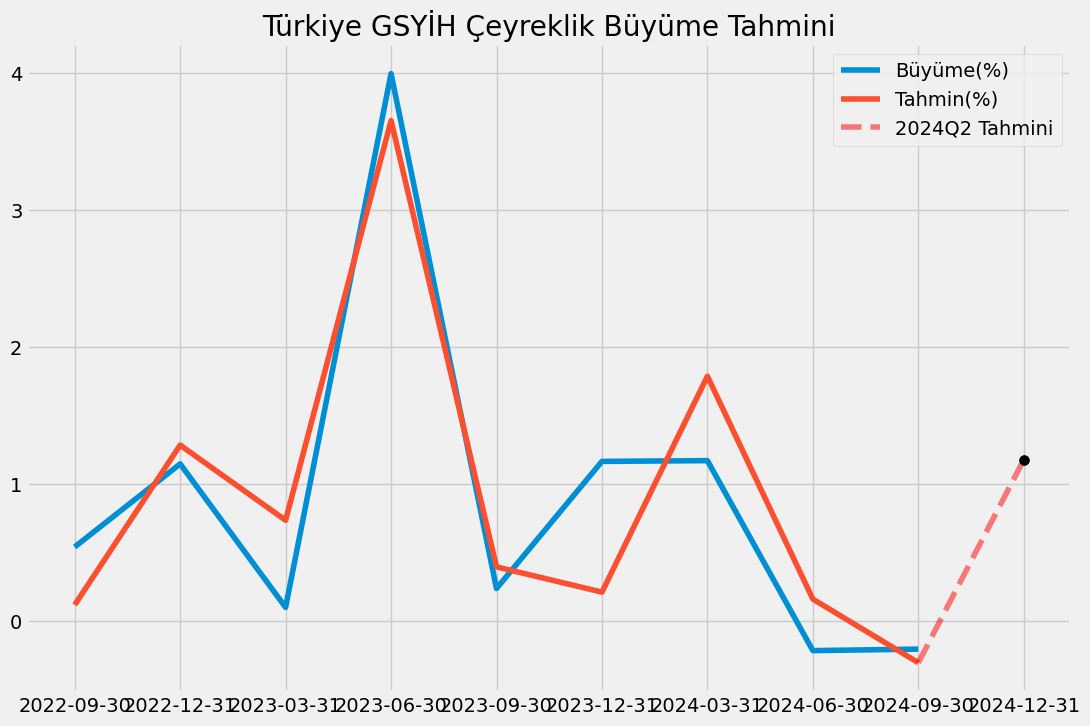

In [81]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [89]:
selected_features=["KKO","İthalat","İşsizlik","Kart","M2","M3","Ticari Faiz","Sanayi","TÜFE","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
    model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.010307800249683127)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=64,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━

In [90]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
model.add(Dense(units=26,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24393371243712603)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.010307800249683127)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=64,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [91]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Büyüme
2022-09-30,0.147736
2022-12-31,1.142185
2023-03-31,0.349654
2023-06-30,3.180946
2023-09-30,0.161466
2023-12-31,-0.088740
2024-03-31,1.713700
2024-06-30,-0.242912
2024-09-30,-0.433230
2024-12-31,0.762903


In [92]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2

,Büyüme,Tahmin
2022-09-30,0.542207,0.147736
2022-12-31,1.148543,1.142185
2023-03-31,0.101158,0.349654
2023-06-30,3.998077,3.180946
2023-09-30,0.239144,0.161466
2023-12-31,1.166981,-0.088740
2024-03-31,1.172372,1.713700
2024-06-30,-0.214586,-0.242912
2024-09-30,-0.203679,-0.433230
2024-12-31,0.000000,0.762903


In [93]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.3127225515200396

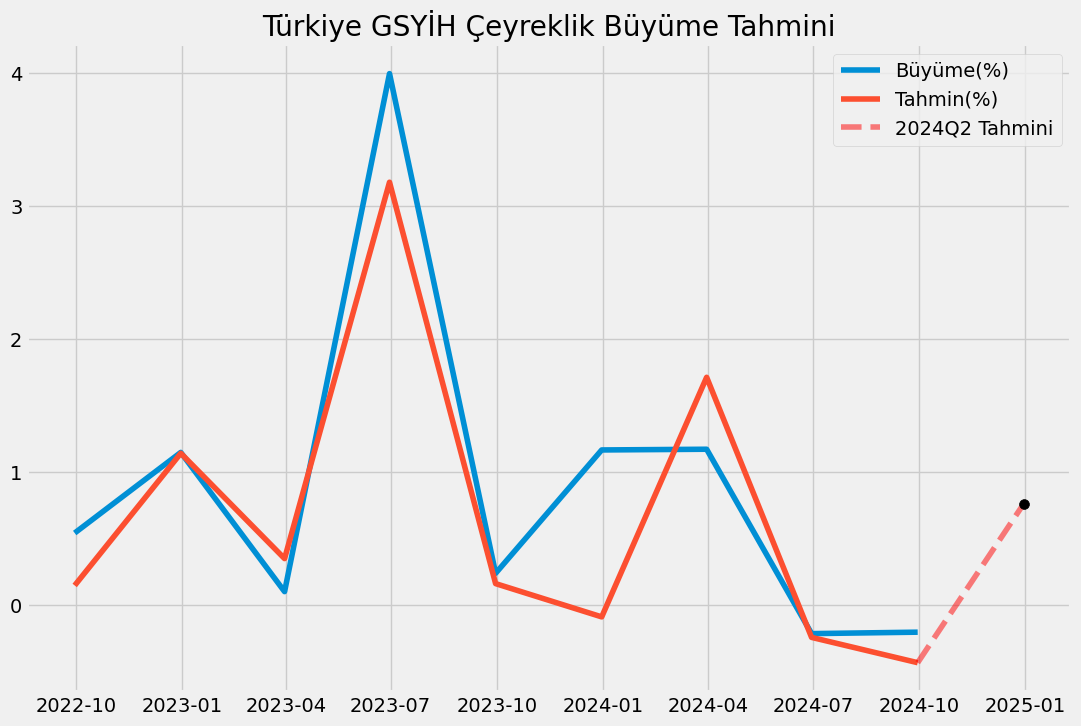

In [94]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler2["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler2["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler2["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler2.index[-1],y=tahminler2["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [95]:
selected_features=["KKO","İthalat","İşsizlik","Kart","M3","Mevduat Faiz 3Ay","Sanayi","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━

In [96]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [97]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,1.002045,0.252988,3.952750
1,1.276066,0.310350,3.222171
2,-1.307765,2.583334,0.387097
3,1.002936,0.279809,3.573862
4,1.048600,0.264547,3.780049
5,1.262457,0.248572,4.022976
6,0.837742,0.320262,3.122448
7,1.585950,0.299912,3.334312
8,1.068581,0.276859,3.611941
9,2.156525,0.551685,1.812628


In [98]:
predictions=predictions[predictions["Hata"]<0.5]

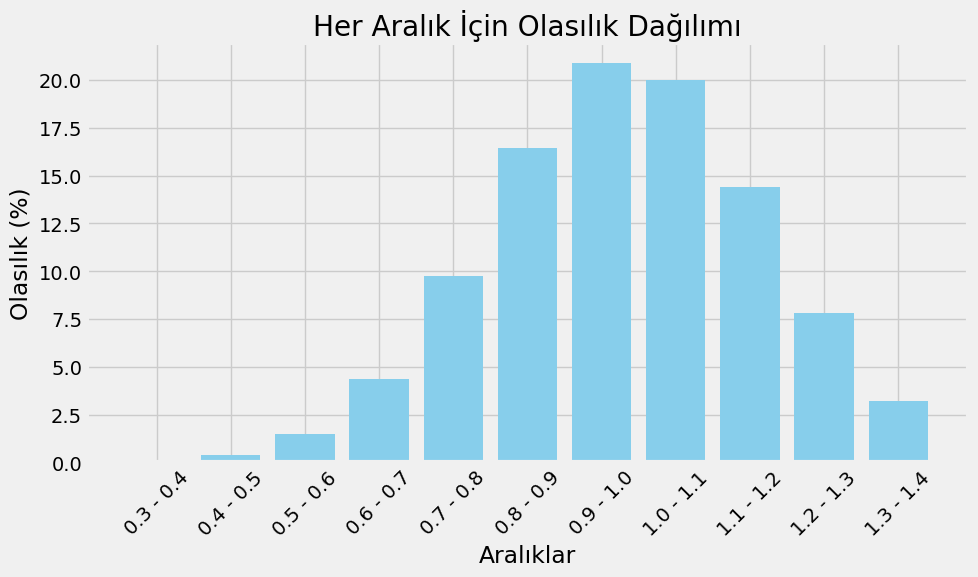

In [99]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = 0.3
bitis =  1.5

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()


In [100]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.85]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%70 olasılıkla tahminler 0.79 ile 1.18 arasındadır.


In [101]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,Büyüme
2022-09-30,0.203098
2022-12-31,1.325875
2023-03-31,0.769407
2023-06-30,3.920985
2023-09-30,0.618691
2023-12-31,0.336075
2024-03-31,2.237873
2024-06-30,-0.140235
2024-09-30,-0.259976
2024-12-31,0.852558


In [102]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3

,Büyüme,Tahmin
2022-09-30,0.542207,0.203098
2022-12-31,1.148543,1.325875
2023-03-31,0.101158,0.769407
2023-06-30,3.998077,3.920985
2023-09-30,0.239144,0.618691
2023-12-31,1.166981,0.336075
2024-03-31,1.172372,2.237873
2024-06-30,-0.214586,-0.140235
2024-09-30,-0.203679,-0.259976
2024-12-31,0.000000,0.852558


In [103]:
mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1])

0.28637691477801747

In [104]:

tahminler3.index=pd.to_datetime(tahminler3.index)
tahminler2.index=pd.to_datetime(tahminler2.index)
tahminler1.index=pd.to_datetime(tahminler1.index)

In [105]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,0.118998,0.147736,0.203098,0.156611,0.542207
2022-12-31,1.285865,1.142185,1.325875,1.251308,1.148543
2023-03-31,0.737141,0.349654,0.769407,0.618734,0.101158
2023-06-30,3.654993,3.180946,3.920985,3.585641,3.998077
2023-09-30,0.396791,0.161466,0.618691,0.392316,0.239144
2023-12-31,0.212385,-0.088740,0.336075,0.153240,1.166981
2024-03-31,1.788468,1.713700,2.237873,1.913347,1.172372
2024-06-30,0.161411,-0.242912,-0.140235,-0.073912,-0.214586
2024-09-30,-0.302679,-0.433230,-0.259976,-0.331962,-0.203679
2024-12-31,1.179312,0.762903,0.852558,0.931591,0.000000


In [106]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-02 tarihli tahmin başarıyla eklendi.


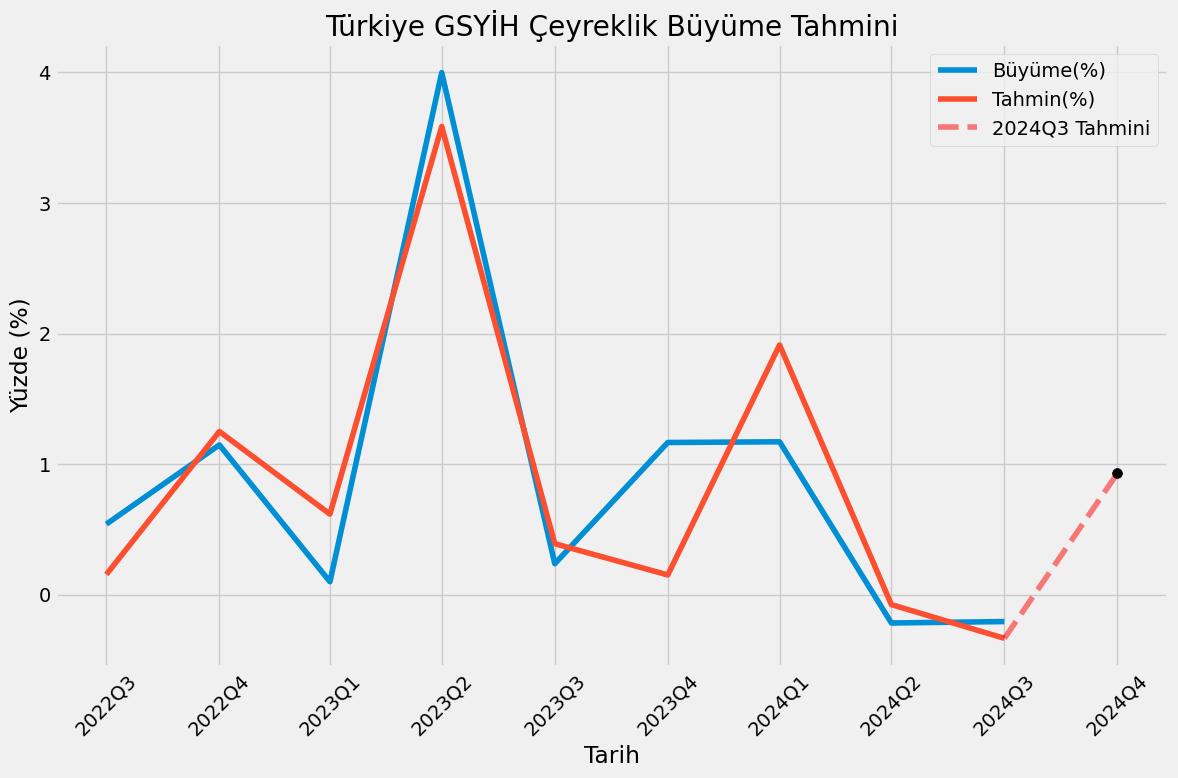

In [107]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [108]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [109]:


veri.loc[pd.to_datetime("2024-12-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [110]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-06-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [111]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [112]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [113]:
veri.to_csv("yıllık.csv")

In [114]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-02 tarihli tahmin başarıyla eklendi.


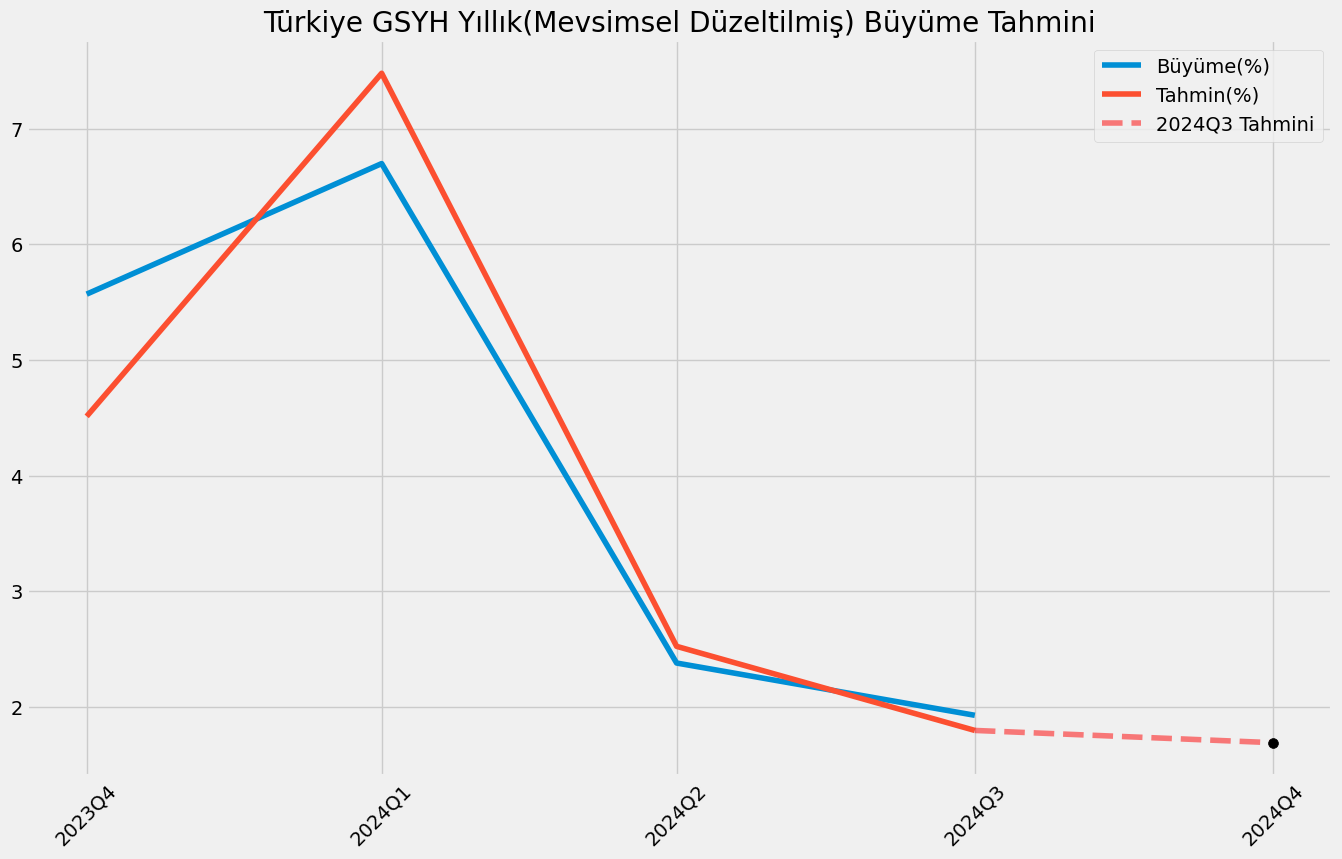

In [115]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





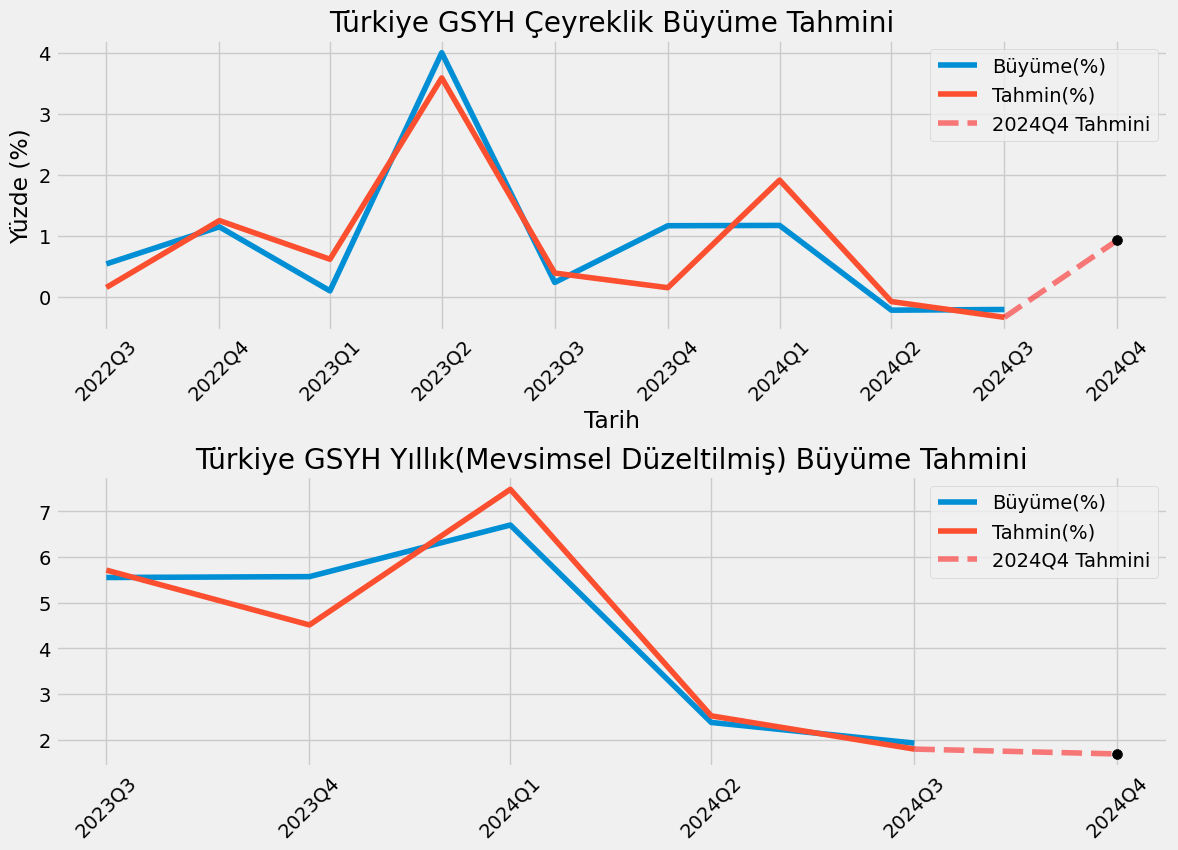

In [116]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q4 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q4 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [117]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.
